# **Network Analysis of Twitter Hashtags using Networkx, Gephi and Flourish**

Speaker: Shreya Sabu

>This tutorial intends to walk through the steps to perform network analysis of Twitter Hashtags. The Twitter data is first obtained from Crimson Hexagon, basic preprocessing is done using python programming and network analysis is done using the standard python library networkx. As an alternative to Networkx, the open source network analysis and visualization software Gephi and the enterprise data visualization tool Flourish is also demonstrated.








#Load the Dependencies

> Some of the required dependencies include **pandas**, **networkx**, **Plotly**

*   [Pandas](https://pandas.pydata.org/pandas-docs/stable/) is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.
*   [Networkx](https://networkx.github.io/documentation/stable/) is a Python library for studying graphs and networks.

*   [Plotly](https://plot.ly/python/) An open-source, interactive graphing library for Python.










In [0]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

#**Step 2:** Upload the CSV file

> Learn more about uploading data on Google colab [here](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)












In [0]:
from google.colab import files
import io
uploaded = files.upload()

Saving hashtag-201716.csv to hashtag-201716 (1).csv


In [0]:
df = pd.read_csv(io.StringIO(uploaded['hashtag-201716.csv'].decode('utf-8')))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,#MintyTees,#Single,#Custom,#DTG,#GraphicDesign…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#MintyTees,#Single,#Custom,#DTG,#GraphicDesign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#tshirt,#DTG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#PromoGifts,#advertising,#sublimation,#silkscreen,#screenprinting,#textile,#screen,#dryers,#DTG,NaN,NaN,NaN,NaN,NaN,NaN
4,#baju,#tshirt,#shirt,#roundneck,#YouCanDuit,#qisharesources,#silkscreen,#malaysia,#SehatiSejiwa,#DTG,NaN,NaN,NaN,NaN,NaN


In [0]:
#shape of data
df.shape

(1154, 15)

#**Step 3:** Getting list of hashtags and their frequecy of occurrence


In [0]:
# list of all hashtags
t=[]

#extracting all the hashtag from csv file
with open('hashtag-201716.csv','r') as f:
    mainlist=[]
    for line in f:
        temp=line.split(",")
        sublist=[]
        for word in temp:
            word=word.replace("'","")
            word=word.replace('"',"")
            if word and word!='\n' and word.startswith("#"):
                sublist.append(word)
            if word and word.startswith("#"):
                t.append(word)
        mainlist.append(sublist)

In [0]:
#keeping unique hashtags
hashtags=list(set(t))

Getting frequency of occurrence of each unique hashtag

---



In [0]:
matrix=[[0]*len(hashtags)]*len(hashtags)
m=[]

final=[]

#dictionary of frequency of occurrence of each unique hashtag
values={}

new={}
for i,h1 in enumerate(hashtags):
  
    li=[]   
    for j,h2 in enumerate(hashtags): 
        c=0
        for sublist in mainlist:
            if h1!=h2:
                if h2 in sublist and h1 in sublist:
                    c=c+1
    
        l=[]
      
        if c>10:        
            matrix[i][j]=c 
            final.append(h1)
            values[h1]=c
            l.append(h1)
            l.append(h2)
            l.append(c)
            tuple(l)
            li.append(h2)          
            m.append(l)

        j=j+1
    i=i+1
    if li:
        new[h1]=li

In [0]:
#nodes and their frequency
print(values)

{'#kornit': 11, '#womens': 19, '#pop': 23, '#customtshirts': 14, '#dtgprinting…': 14, '#tshirts': 36, '#tshirtprinting': 12, '#tshirt': 32, '#anime': 23, '#custom': 13, '#customeverything': 17, '#dtgprinting': 57, '#forsale': 15, '#ScreenPrint': 13, '#itswhatwedo': 20, '#design': 18, '#anajet': 14, '#customtees': 12, '#vinyl': 26, '#embroidery': 20, '#apparel': 23, '#mashup': 23, '#mens': 19, '#print': 45, '#tee': 23, '#dtg': 23, '#VDDesigns': 18, '#Raleigh': 14, '#shirt': 13, '#customapparel': 15, '#Apparel': 15, '#dtgprint': 11, '#etsy': 24, '#comics': 23, '#rnrcustomtattoosandapparel': 12, '#wpclothing': 19, '#Custom': 13, '#digitalprinting': 14, '#Embroidery': 13, '#directtogarment': 18, '#tees': 21, '#screenprinting': 20, '#smallbusiness': 13, '#etsyshop': 11, '#Tees': 12, '#ebay': 16, '#printing': 25, '#DTG': 15, '#scifi': 23, '#Printing': 17, '#MintyTees': 13, '#BigFrog': 15, '#fashion': 16, '#digital': 12, '#heatpress': 20}


#**Step 3:** Building networkx graph
We use networkx to build our graph and include our nodes and edges in the graph 


In [0]:
#intializing the networkx graph object
G=nx.MultiGraph()

We add all the nodes into the graph using the add_node method.

In [0]:
#values.keys() contains list of all hashtags which are used as nodes here
G.add_nodes_from(values.keys())

Now we add edges in the graph

In [0]:
#adding edges
for k, v in new.items():
    G.add_edges_from(([(k, t) for t in v]))

We now assign some position to each node for plotting. We can do so using a method called spring_layout in networkx.

In [0]:
pos = nx.spring_layout(G)
for node in G.nodes:
    G.nodes[node]['pos'] = list(pos[node])

#**Step 3:** Plot using plotly.
### Now that our graph is set, we are ready to plot using plotly.
#### We create go objects of plotly and assign the data to the objects.
---


#### Scatter object to create a node_trace object, setting the sizes and colors of the nodes

In [0]:
node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=[],
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

#### Scatter object to create a edge_trace object, setting the sizes and colors of the edges

In [0]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')


#### Now we assign annotations to the nodes and edges.

In [0]:
for node, adjacencies in enumerate(G.adjacency()):
  node_trace['marker']['color']+=tuple([len(adjacencies[1])])
  node_info = str(adjacencies[0])
  node_trace['text']+=tuple([node_info])

In [0]:
# size nodes by their frequency of occurrence
for i in values:
  node_trace['marker']['size']+=tuple([values[i]])

#### Now we plot go objects created above node_trace and edge_trace using Figure.

In [0]:
#visualizing graph
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )


fig.show()

The above network graph can be zoomed in. Hovering over the nodes gives the hashtag labels. The size and color of each node indicates its frequency of occurence.

#Modularity index

> Find communities in graph using the concept of modularity index. Greedy modularity maximization begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists. Read more about [Clauset-Newman-Moore greedy modularity maximization](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html)

> The preprocessed hashtag data can be directly imported to Gephi. Watch [Gephi Tutorial](https://www.youtube.com/watch?v=gcfAT8aMxuQ) to experiment with the loaded twitter hashtag dataset. Adjust the modularity score on the Gephi interface to identify communities. 





##Output from Gephi using the modularity score.

In [9]:
from google.colab import files
uploaded = files.upload()


Saving Gephi_2.png to Gephi_2.png


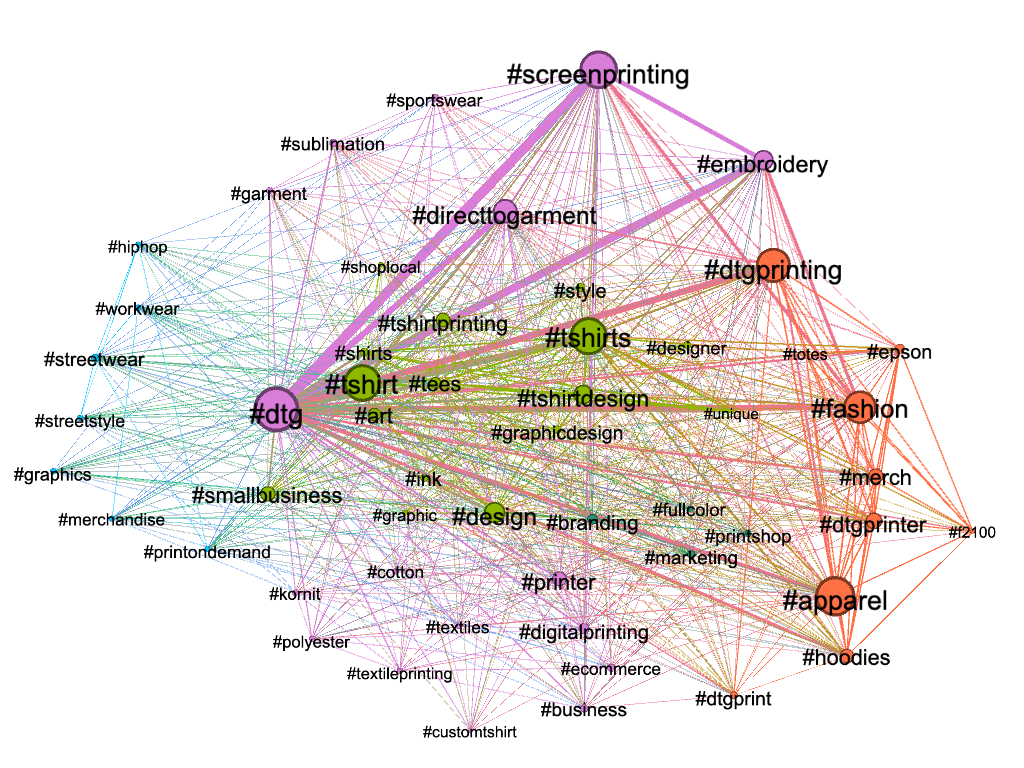

In [8]:
from IPython.display import Image
Image('Gephi_1.png')

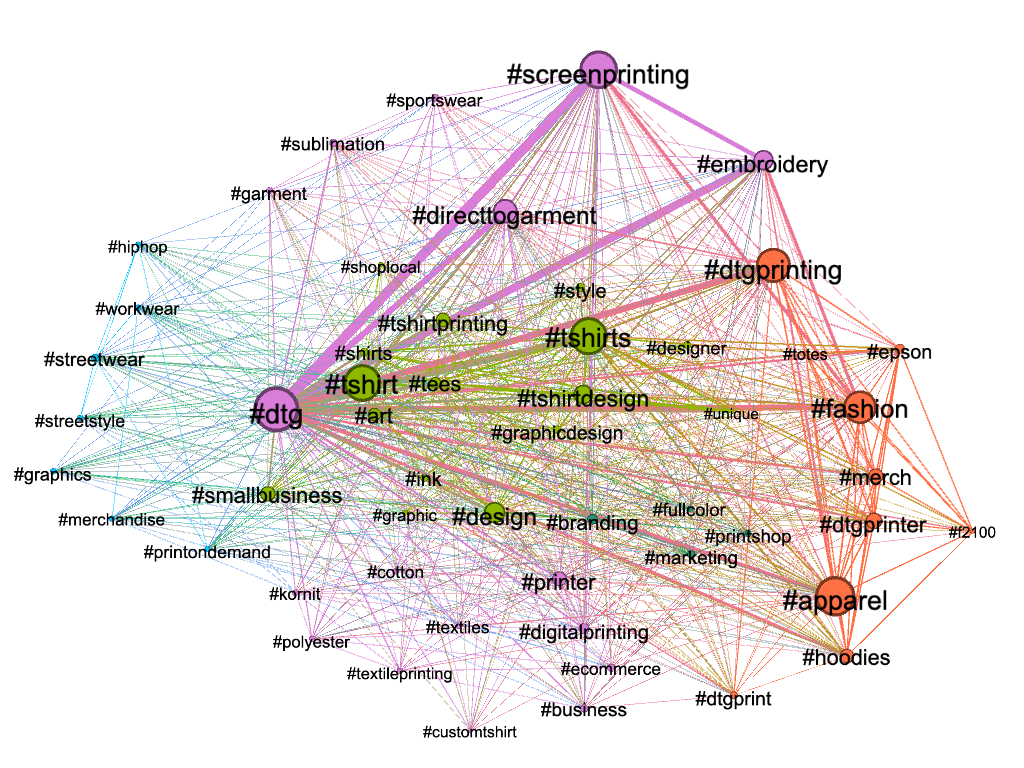

In [10]:
Image('Gephi_1.png')

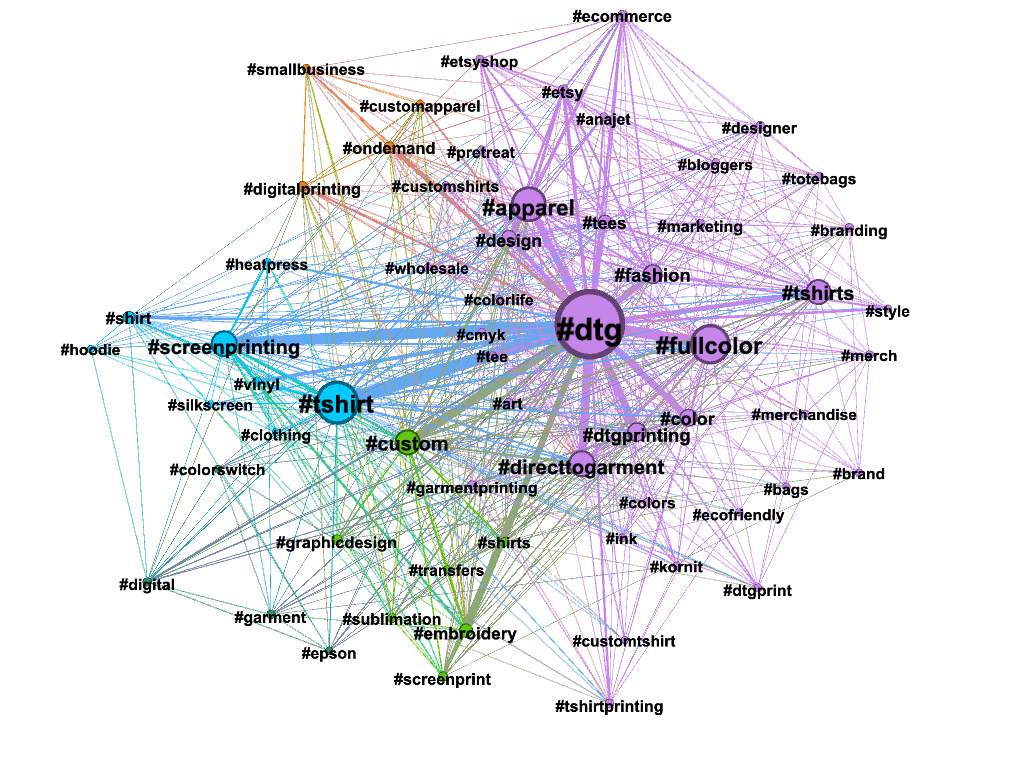

In [11]:
Image('Gephi_2.png')